***1. Introduction:***

*What is Customer Segmentation?*

> Customer segmentation is the practice of dividing a customer base into groups of individuals that are similar in specific ways relevant to marketing, such as age, gender, interests, spending habits, etc,.


*Why Customer Segmentation?*

> Customer segmentation allows us to reach a customer or prospect more precisely based on their specific needs and wants. And also to better identify the most valuable customer segments. So as to improve the return on marketing investment by only targeting those likely to be our best customers.


***2. Importing the dependencies:***

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

***3. Data Collection and Analysis:***

In [4]:
# Loading the data from csv to a Pandas Data Frame.
customer_data = pd.read_csv('/content/Mall_Customers.csv')

In [5]:
# First five rows in the data frame.
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
# Finding the number of rows and columns.
customer_data.shape

(200, 5)

In [7]:
# Getting the data types of the attributes used in the Data Frame.
customer_data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [8]:
# Getting some more information about the dataset.
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
# Checking for missing values in the given customer data.
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
# Here we have no null values and errors so no pre-processing of data is required.
# Getting the description of the given customer data.
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


***4. Exploring the data based on the available attributes:***

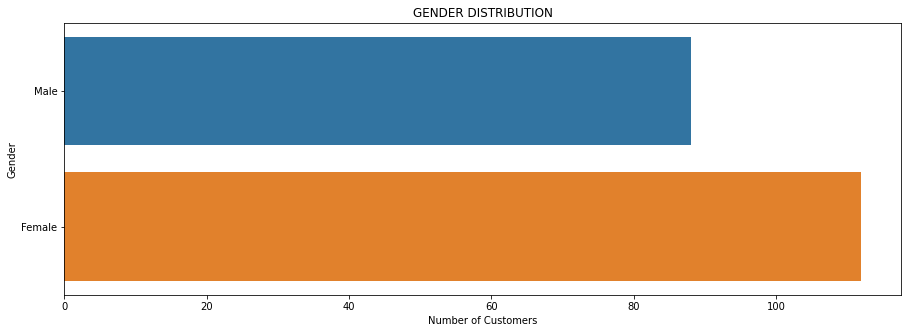

In [11]:
# Data Visualization based on the gender of customers. 

plt.figure(figsize=(15,5))
sns.countplot(y='Gender',data=customer_data)
plt.title('GENDER DISTRIBUTION')
plt.xlabel('Number of Customers')
plt.ylabel('Gender')
plt.show()

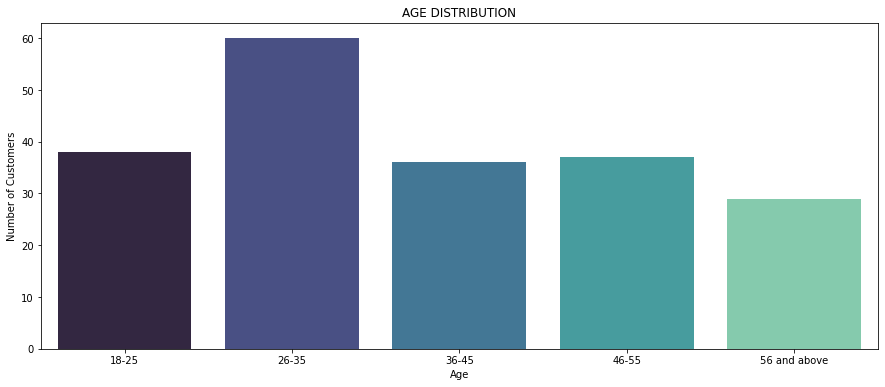

In [12]:
# Data visualisation based on the age of customers.

age_18_25 = customer_data.Age[(customer_data.Age >= 18) & (customer_data.Age <= 25)]
age_26_35 = customer_data.Age[(customer_data.Age >= 26) & (customer_data.Age <= 35)]
age_36_45 = customer_data.Age[(customer_data.Age >= 36) & (customer_data.Age <= 45)]
age_46_55 = customer_data.Age[(customer_data.Age >= 46) & (customer_data.Age <= 55)]
age_55plus =  customer_data.Age[(customer_data.Age >= 56)]

agex = ["18-25", "26-35", "36-45", "46-55", "56 and above"]
agey = [len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_55plus.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=agex,y=agey,palette="mako")
plt.title('AGE DISTRIBUTION')
plt.xlabel('Age')
plt.ylabel('Number of Customers') 
plt.show()

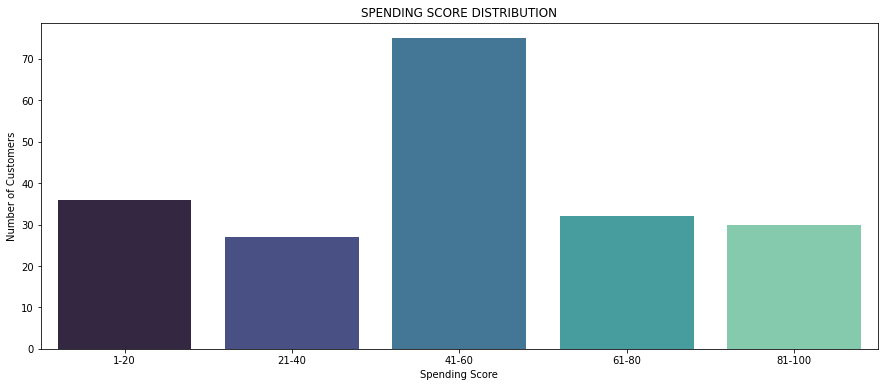

In [13]:
# Data visualisation based on the Spending Scores of the customers.

ss_1_20 = customer_data["Spending Score (1-100)"][(customer_data["Spending Score (1-100)"] >= 1) & (customer_data["Spending Score (1-100)"] <= 20)]
ss_21_40 = customer_data["Spending Score (1-100)"][(customer_data["Spending Score (1-100)"] >= 21) & (customer_data["Spending Score (1-100)"] <= 40)]
ss_41_60 = customer_data["Spending Score (1-100)"][(customer_data["Spending Score (1-100)"] >= 41) & (customer_data["Spending Score (1-100)"] <= 60)]
ss_61_80 = customer_data["Spending Score (1-100)"][(customer_data["Spending Score (1-100)"] >= 61) & (customer_data["Spending Score (1-100)"] <= 80)]
ss_81_100 = customer_data["Spending Score (1-100)"][(customer_data["Spending Score (1-100)"] >= 81) & (customer_data["Spending Score (1-100)"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss_1_20.values),len(ss_21_40.values),len(ss_41_60.values),len(ss_61_80.values),len(ss_81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx,y=ssy,palette="mako")
plt.title('SPENDING SCORE DISTRIBUTION')
plt.xlabel('Spending Score')
plt.ylabel('Number of Customers') 
plt.show()

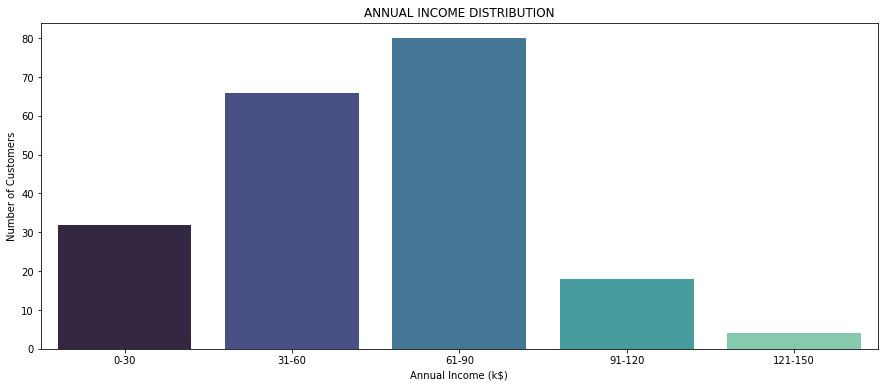

In [14]:
# Data visualisation based on the Annual Incomes of the customers.

ai_0_30 = customer_data["Annual Income (k$)"][(customer_data["Annual Income (k$)"] >= 0) & (customer_data["Annual Income (k$)"] <= 30)]
ai_31_60 = customer_data["Annual Income (k$)"][(customer_data["Annual Income (k$)"] >= 31) & (customer_data["Annual Income (k$)"] <= 60)]
ai_61_90 = customer_data["Annual Income (k$)"][(customer_data["Annual Income (k$)"] >= 61) & (customer_data["Annual Income (k$)"] <= 90)]
ai_91_120 = customer_data["Annual Income (k$)"][(customer_data["Annual Income (k$)"] >= 91) & (customer_data["Annual Income (k$)"] <= 120)]
ai_121_150 = customer_data["Annual Income (k$)"][(customer_data["Annual Income (k$)"] >= 121) & (customer_data["Annual Income (k$)"] <= 150)]

aix = ["0-30", "31-60", "61-90", "91-120", "121-150"]
aiy = [len(ai_0_30.values),len(ai_31_60.values),len(ai_61_90.values),len(ai_91_120.values),len(ai_121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix,y=aiy,palette="mako")
plt.title('ANNUAL INCOME DISTRIBUTION')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Number of Customers') 
plt.show()

***5. Using WCSS  (Within Clusters Sum of Squares):***

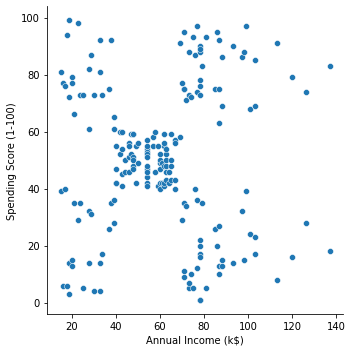

In [15]:
# Analysing the basic plot of the data on the basis of Annual Income vs Spending Score.
sns.relplot(x = "Annual Income (k$)", y = "Spending Score (1-100)", data = customer_data)

In [21]:
# Choosing the Annual Income column and Spending score column.
X = customer_data.iloc[:,[3,4]].values
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [17]:
# And finding WCSS value for different number of clusters.

wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++')
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

***6. Plotting the Elbow Curve:***



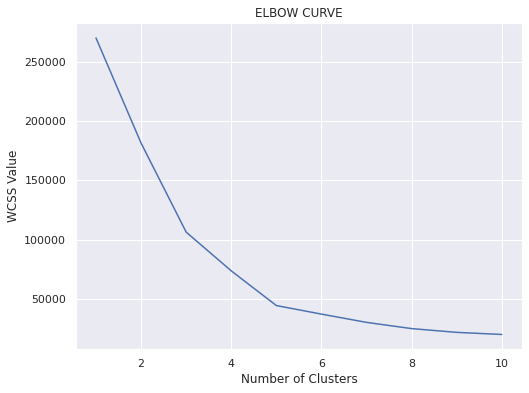

In [19]:
# Plotting an Elbow Graph to obtain optimum number of clusters.
sns.set()
plt.figure(figsize=(8,6))
plt.plot(range(1,11),wcss)
plt.title('ELBOW CURVE')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS Value')
plt.show()

***7. Taking the K-Means Clustering model:***


In [20]:
# From the Elbow curve the optimum number of Clusters = 5.
kmeans = KMeans(n_clusters=5, init='k-means++')

# Return  a label for each data point based on their cluster
Y = kmeans.fit_predict(X)
print(Y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


***8. Visualizing the Clusters:***

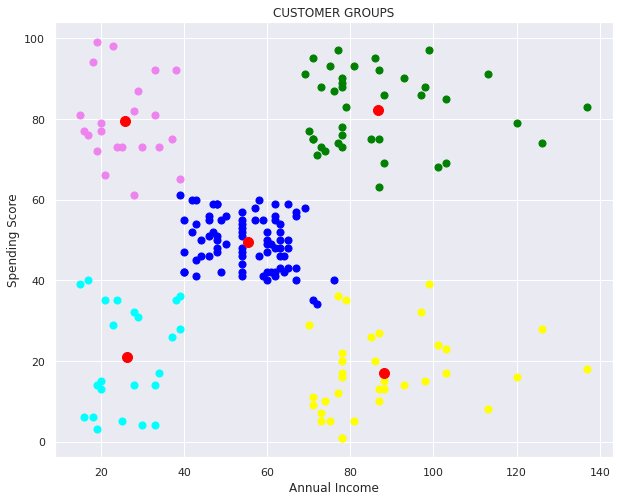

In [ ]:
# Plotting all the clusters and their centroids.

# For the clusters
plt.figure(figsize=(10,8))
plt.scatter(X[Y==0,0],X[Y==0,1], s=50, c='cyan', label='Cluster 1')
plt.scatter(X[Y==1,0],X[Y==1,1], s=50, c='green', label='Cluster 2')
plt.scatter(X[Y==2,0],X[Y==2,1], s=50, c='blue', label='Cluster 3')
plt.scatter(X[Y==3,0],X[Y==3,1], s=50, c='yellow', label='Cluster 4')
plt.scatter(X[Y==4,0],X[Y==4,1], s=50, c='violet', label='Cluster 5')

# For the centroids.
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=100, c='red', label='Centroids')
plt.title('CUSTOMER GROUPS')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()